# Funciones de distribución de probabilidades

## Distribución Uniforme 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99944.,  99871., 100167., 100149., 100425.,  99729.,  99684.,
         99994., 100106.,  99931.]),
 array([ 1.00000982, 10.90000121, 20.7999926 , 30.69998399, 40.59997538,
        50.49996677, 60.39995816, 70.29994955, 80.19994094, 90.09993233,
        99.99992372]),
 <a list of 10 Patch objects>)

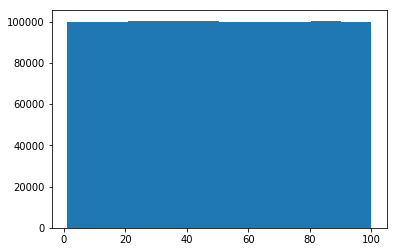

In [9]:
%matplotlib inline
plt.hist(data)

## Distribución normal o "La Campana de Gauss" 

In [10]:
data = np.random.randn(1000000)

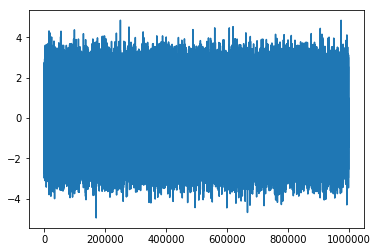

In [11]:
x = range(1, 1000001)
plt.plot(x, data)

(array([3.00000e+01, 1.33600e+03, 2.05240e+04, 1.27949e+05, 3.28709e+05,
        3.44824e+05, 1.48427e+05, 2.62840e+04, 1.85200e+03, 6.50000e+01]),
 array([-4.96062041, -3.97939272, -2.99816503, -2.01693734, -1.03570965,
        -0.05448196,  0.92674573,  1.90797342,  2.88920111,  3.8704288 ,
         4.85165649]),
 <a list of 10 Patch objects>)

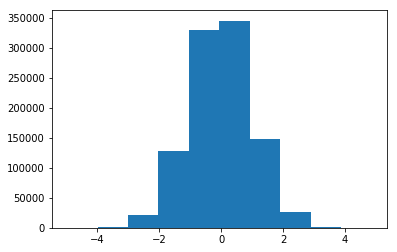

In [12]:
plt.hist(data)

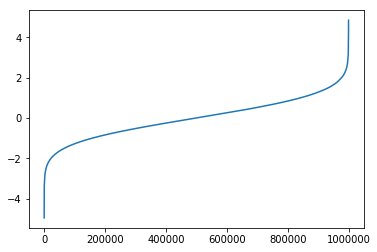

In [13]:
plt.plot(x,sorted(data))

(array([  14.,   82.,  407., 1360., 2554., 2803., 1906.,  688.,  175.,
          11.]),
 array([-4.22571816, -2.35723373, -0.48874931,  1.37973512,  3.24821955,
         5.11670397,  6.9851884 ,  8.85367283, 10.72215725, 12.59064168,
        14.45912611]),
 <a list of 10 Patch objects>)

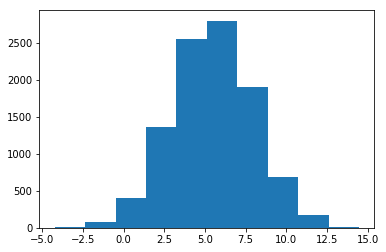

In [14]:
mu = 5.5
sd = 2.5
z = np.random.randn(10000)
data = mu + sd * z # z = (X - mu) / sd    Tipicar cualquier varialble
plt.hist(data)

In [15]:
data = np.random.randn(2,4)
data

array([[-0.5901871 ,  0.1516969 , -0.42000986, -0.17939629],
       [ 0.95756789,  1.03220301, -1.7392379 , -0.1070545 ]])

## La Simulación de Monte Carlo

* Generamos 2 numero aleatorios entre 0 y 1
* Calcularemos x * x + y * y
    * Si el valor es inferiro a 1, esta dentro del circulo
    * Si el valor es superior a 1, esta fuera del circulo
* Calculamos el número total de veces que estan dentro del círculo y lo dividmos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces, para obtener diferentes aproximaciones de π.
* Calculamos el promedio de los expermentos para obtener un valor final.

In [20]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0 
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg/n_exp
    fig = plt.plot(pi_value_list)
    return(pi, fig)

(3.141598, [<matplotlib.lines.Line2D at 0x1f3a4d4f1d0>])

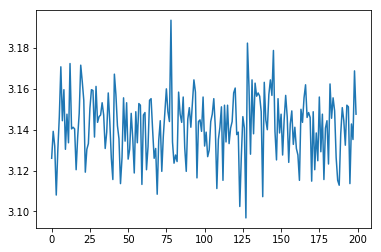

In [25]:
pi_montecarlo(10000,200)

### Dummy Data Sets

In [38]:
n = 1000000
data = pd.DataFrame(
    {
        "A" : np.random.randn(n),
        "B" : 1.5 + 2.5 * np.random.randn(n),
        "C" : np.random.uniform(5, 32, n)
    }
)

In [39]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000967,1.498382,18.509614
std,1.000661,2.498141,7.794039
min,-4.851625,-10.205661,5.000020
25%,-0.675700,-0.187604,11.773276
50%,-0.001618,1.499174,18.505979
75%,0.673440,3.183962,25.262655
max,4.889246,14.306264,31.999985


(array([5.30000e+01, 1.81200e+03, 2.51090e+04, 1.43217e+05, 3.37962e+05,
        3.31544e+05, 1.35522e+05, 2.31460e+04, 1.59400e+03, 4.10000e+01]),
 array([-4.85162508, -3.877538  , -2.90345092, -1.92936384, -0.95527676,
         0.01881032,  0.9928974 ,  1.96698448,  2.94107156,  3.91515864,
         4.88924572]),
 <a list of 10 Patch objects>)

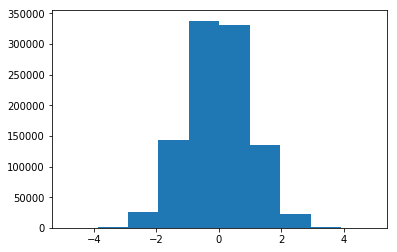

In [40]:
plt.hist(data["A"])

(array([1.00000e+02, 3.13900e+03, 3.74560e+04, 1.82834e+05, 3.63810e+05,
        2.98054e+05, 1.00055e+05, 1.37730e+04, 7.61000e+02, 1.80000e+01]),
 array([-10.20566065,  -7.75446816,  -5.30327567,  -2.85208318,
         -0.40089069,   2.0503018 ,   4.50149429,   6.95268678,
          9.40387927,  11.85507176,  14.30626425]),
 <a list of 10 Patch objects>)

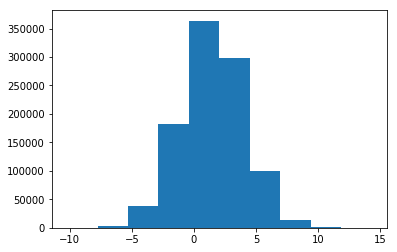

In [41]:
plt.hist(data["B"])

(array([ 99827.,  99511., 100046.,  99802., 100586.,  99931.,  99802.,
        100176., 100052., 100267.]),
 array([ 5.00001955,  7.70001613, 10.4000127 , 13.10000927, 15.80000585,
        18.50000242, 21.199999  , 23.89999557, 26.59999214, 29.29998872,
        31.99998529]),
 <a list of 10 Patch objects>)

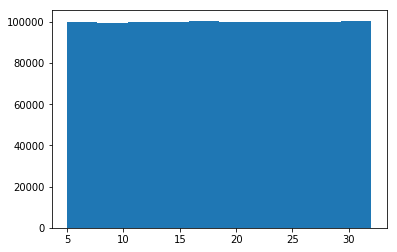

In [43]:
plt.hist(data["C"])

In [5]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [6]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
column_names = data.columns.values.tolist()

In [11]:
a = len(column_names)
a

21

In [20]:
new_data = pd.DataFrame(
    {
        "Columnn Name" : column_names,
        "A" : np.random.randn(a),
        "B" : np.random.uniform(0,1,a)
    }, index = range(42,42+a)
)

In [21]:
new_data

,Columnn Name,A,B
42,State,1.097553,0.528996
43,Account Length,-0.244465,0.363793
44,Area Code,-0.508086,0.775074
45,Phone,-1.429405,0.185191
46,Int'l Plan,0.547050,0.943306
47,VMail Plan,-0.962283,0.220411
48,VMail Message,-0.012766,0.199856
49,Day Mins,1.104472,0.390892
50,Day Calls,-0.225013,0.376904
51,Day Charge,0.131328,0.019131
